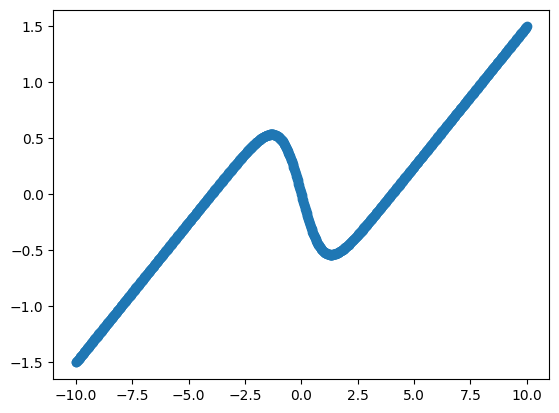

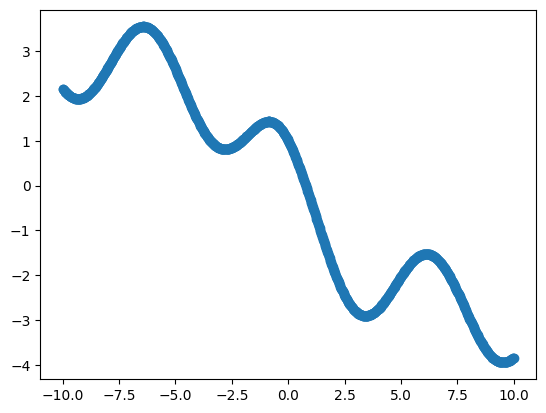

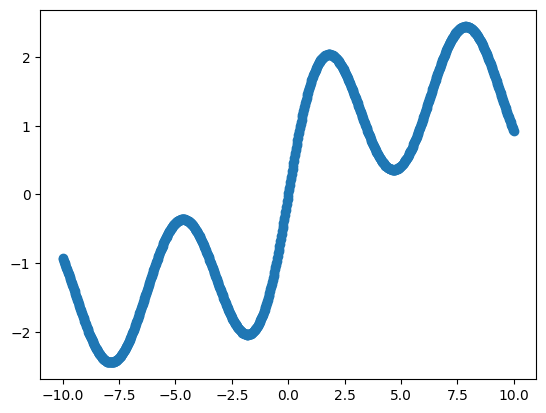

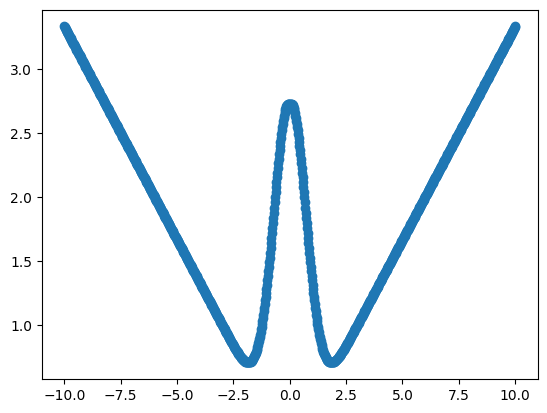

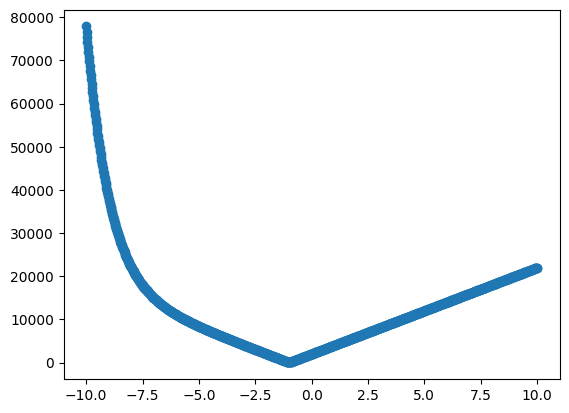

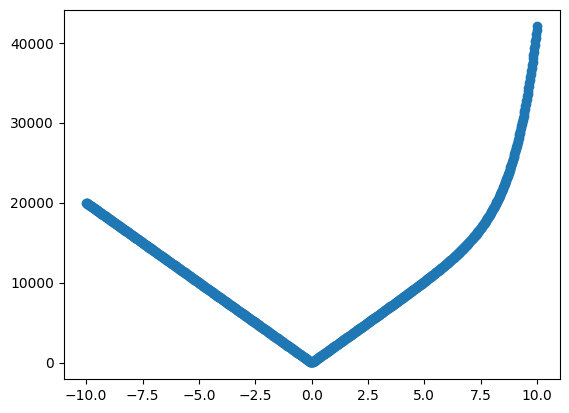

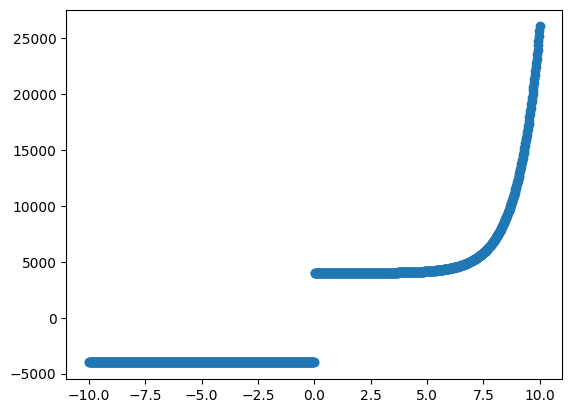

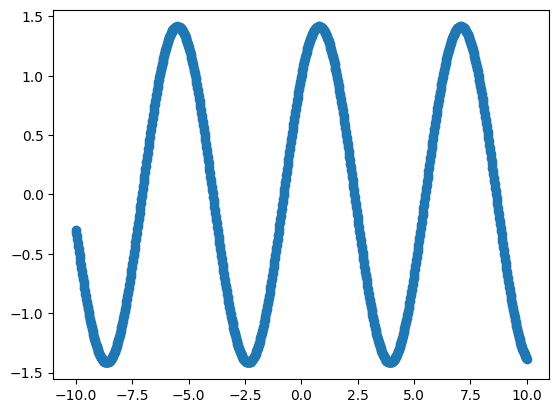

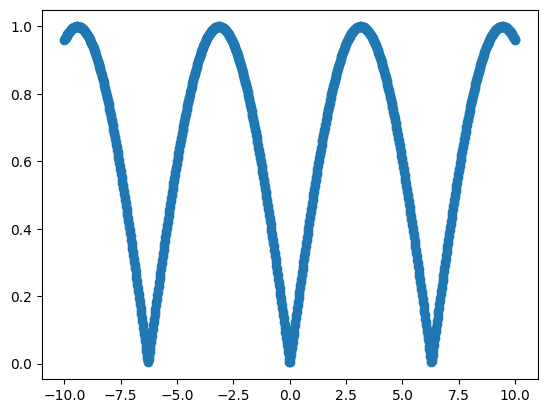

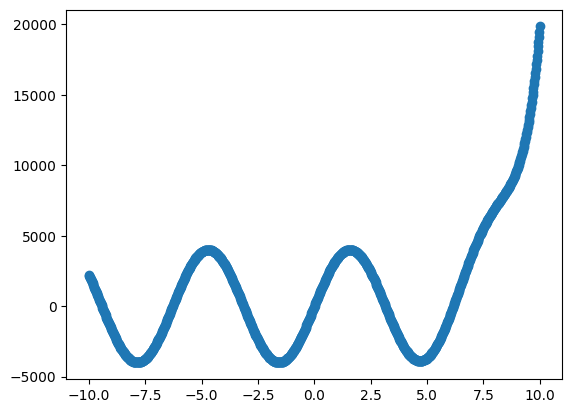

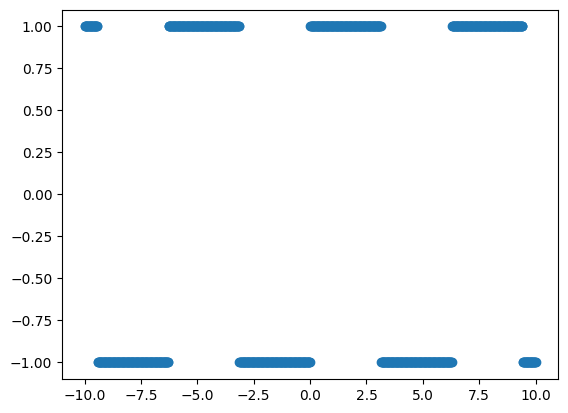

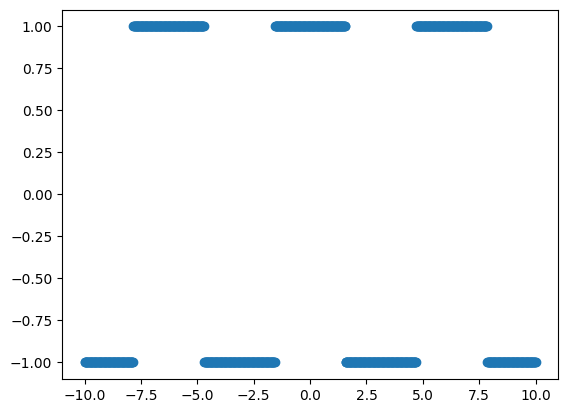

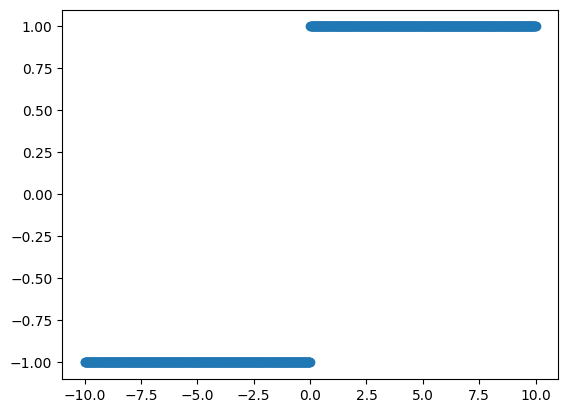

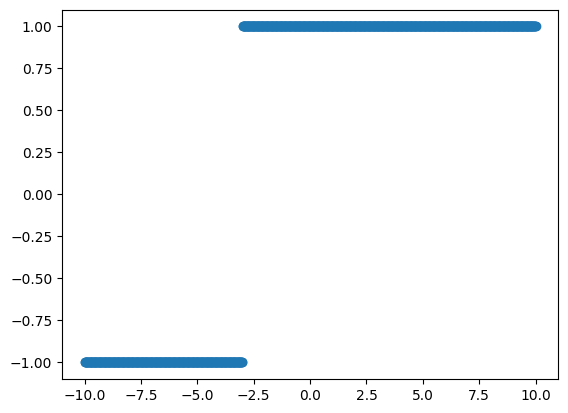

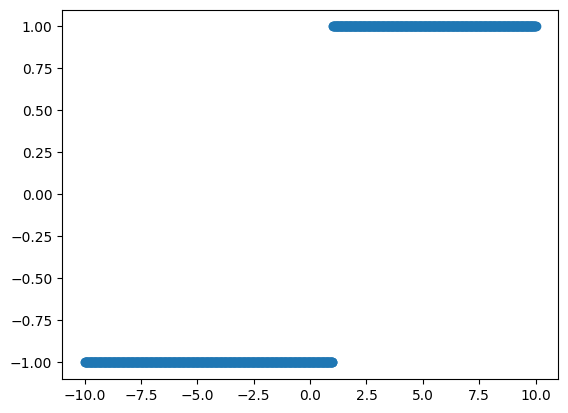

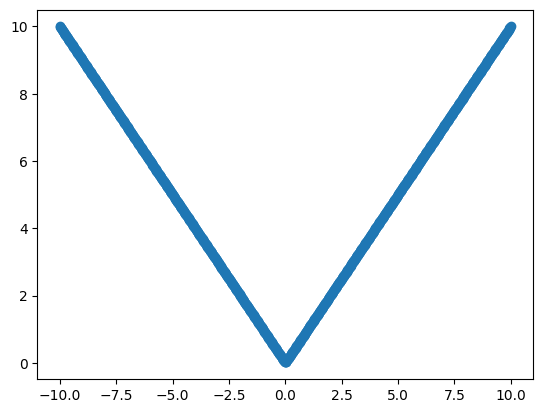

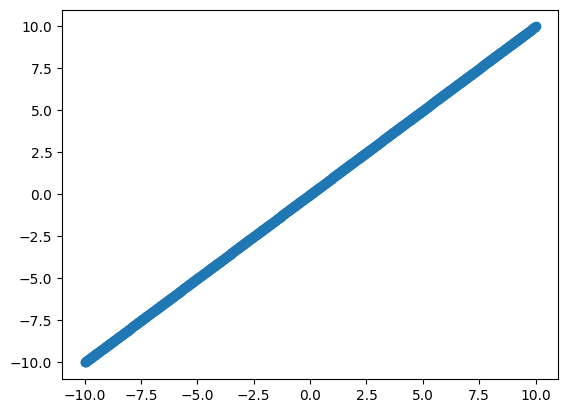

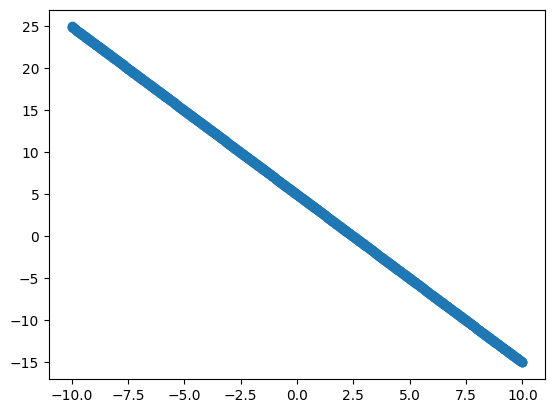

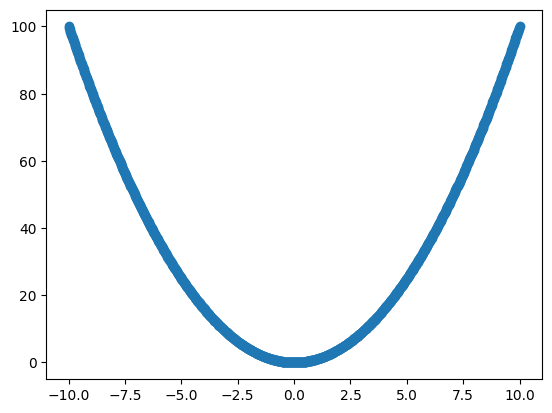

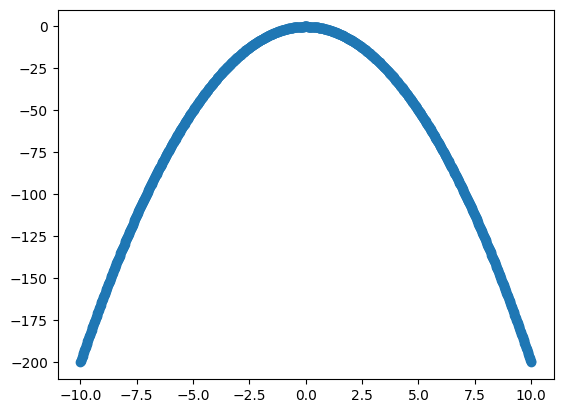

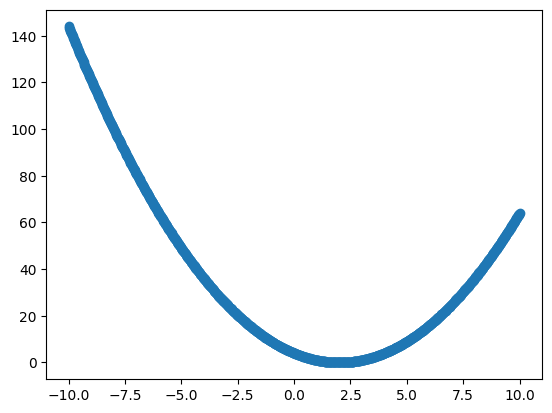

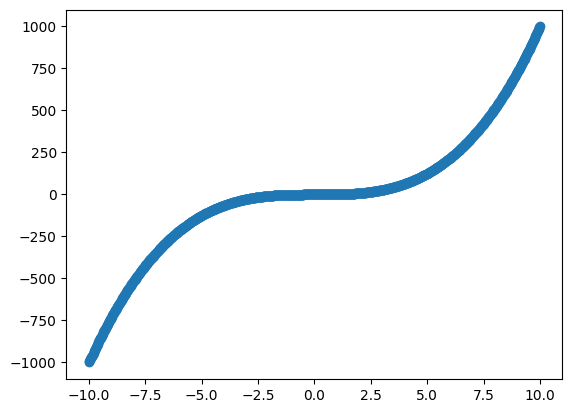

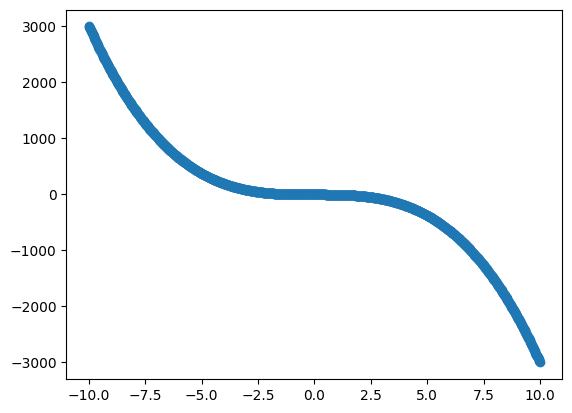

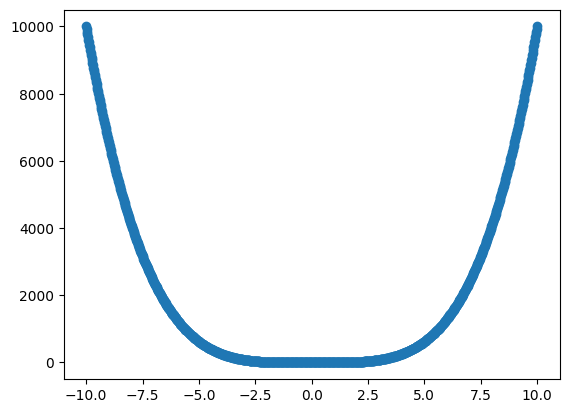

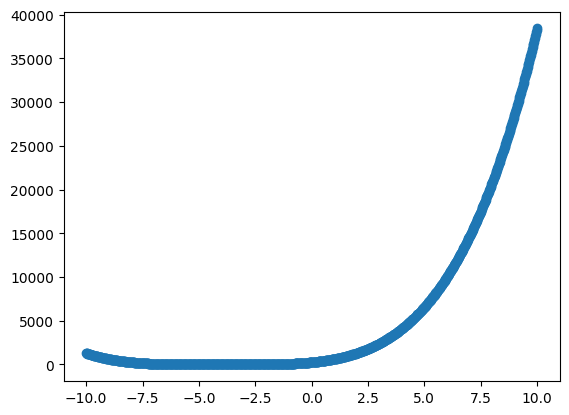

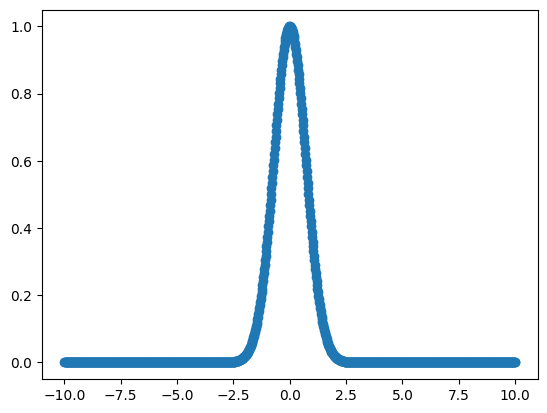

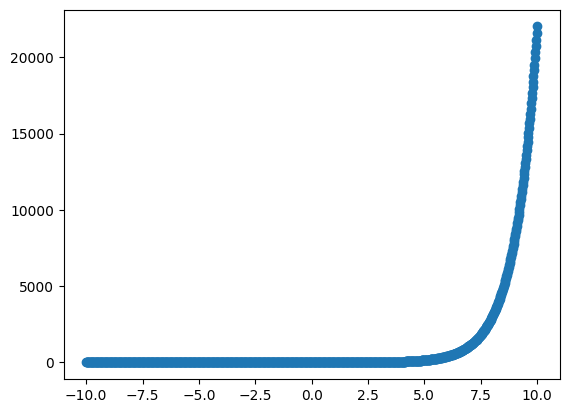

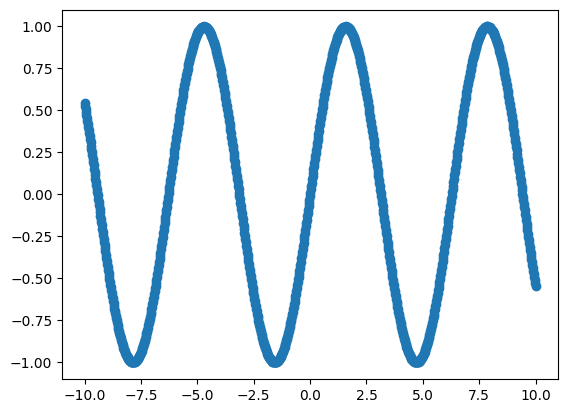

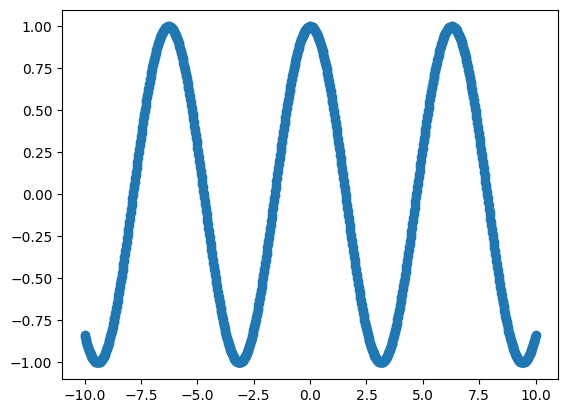

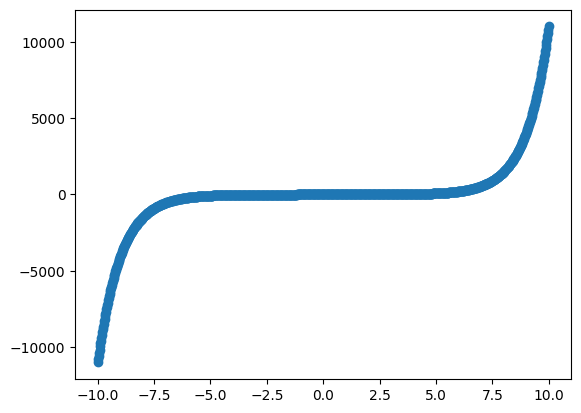

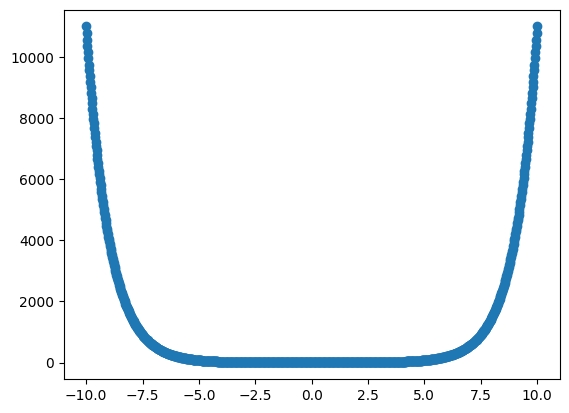

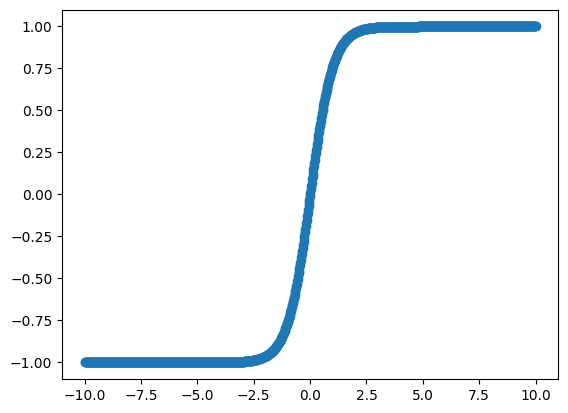

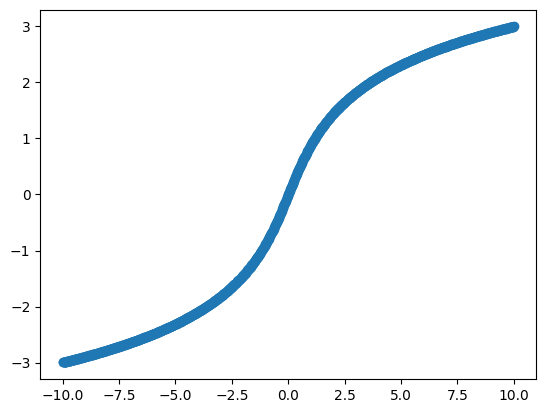

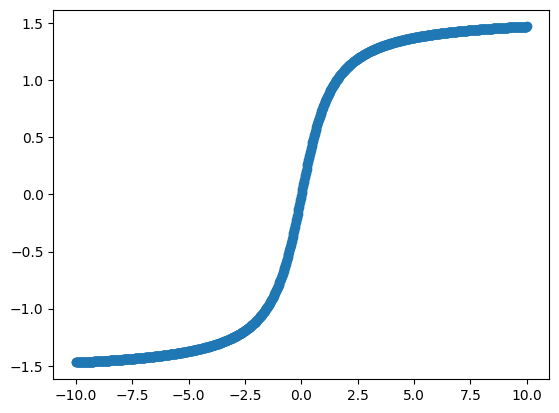

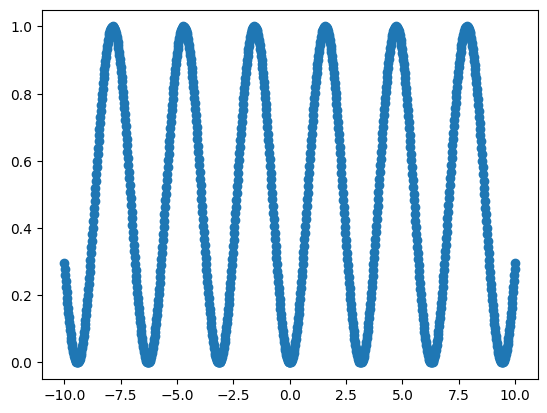

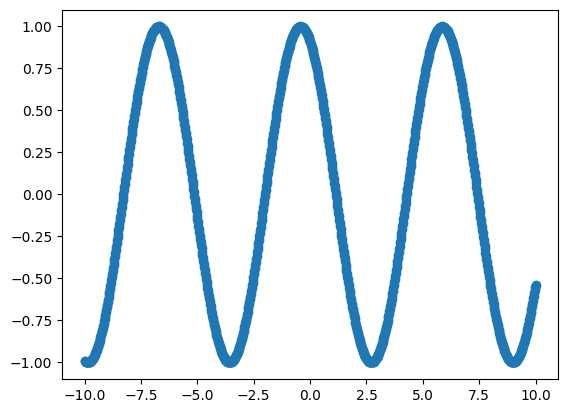

In [152]:
import numpy as np

benchmark = [

    # combinations
    (lambda x: -np.tanh(x) + 1/4 * x, '-tanh(x) + 1/4 * x)'),
    (lambda x: -np.arcsinh(x) + np.cos(x), '-arcsinh(x) + cos(x)'),
    (lambda x: np.arctan(x) + np.sin(x), 'np.arctan(x) + sin(x)'),
    (lambda x: np.exp(-x**2+1) + 1/3*np.abs(x), 'exp(-x^2+1)+ 1/3 * |x|'),
    (lambda x: np.exp(-x+1) + 2000* np.abs(x+1), 'exp(-x+1)+ 2000 * abs(x+1)'),
    (lambda x: np.exp(x) + 2000* np.abs(x), 'exp(x)+ 2000 * abs(x)'),
    (lambda x: np.exp(x) + 4000* np.sign(x), 'exp(x)+ 4000 * sign(x)'),
    (lambda x: np.sin(x) + np.cos(x), 'sin(x)+cos(x)'),
    (lambda x: np.abs(np.sin(x/2)), '|sin(x/2)|'),
    (lambda x: np.exp(x) + 4000* np.sin(x), 'sin(x)'),
    (lambda x: np.sign(np.sin(x)), 'sign(sin(x))'),
    (lambda x: np.sign(np.cos(x)), 'sign(cos(x))'),


    # basic functions
    (lambda x: np.sign(x), 'sign(x)'),
    (lambda x: np.sign(x+3), 'sign(x+3)'),
    (lambda x: np.sign(x-1), 'sign(x-1)'),
    (lambda x: np.abs(x), '|x|'),


    # polynomials
    (lambda x: x, 'x'),
    (lambda x: -2*x+5, '2*x+5'),
    (lambda x: x**2, 'x^2'),
    (lambda x: -2*x**2, '-2*x^2'),
    (lambda x: (x-2)**2, '(x-2)^2'),
    (lambda x: x**3, 'x^3'),
    (lambda x: -3*x**3, '-3*x^3'),
    (lambda x: x ** 4, 'x^4'),
    (lambda x: (x + 4) ** 4, '(x + 4)^4'),

    # exponential
    (lambda x: np.exp(-x**2), 'exp(-x^2)'),
    (lambda x: np.exp(x), 'exp(x)'),

    # trigonometric
    (lambda x: np.sin(x), 'sin(x)'),
    (lambda x: np.cos(x), 'cos(x)'),
    (lambda x: np.sinh(x), 'sinh(x)'),
    (lambda x: np.cosh(x), 'cosh(x)'),
    (lambda x: np.tanh(x), 'tanh(x)'),
    (lambda x: np.arcsinh(x), 'arcsinh(x)'),
    (lambda x: np.arctan(x), 'arctan(x)'),

    #
    (lambda x: np.sin(x) ** 2, ''),
    (lambda x: np.sin(x+2), 'sin(x+2)'),

    # 

]

functions = [f for f, _ in benchmark]

# for each, function draw 1000 samples from a uniform distribution and plot the function
import matplotlib.pyplot as plt
function_points = []
x = np.linspace(-10, 10, 1000)
for f in functions:
    y = f(x)
    function_points.append(y)
    plt.scatter(x, y)
    plt.show()

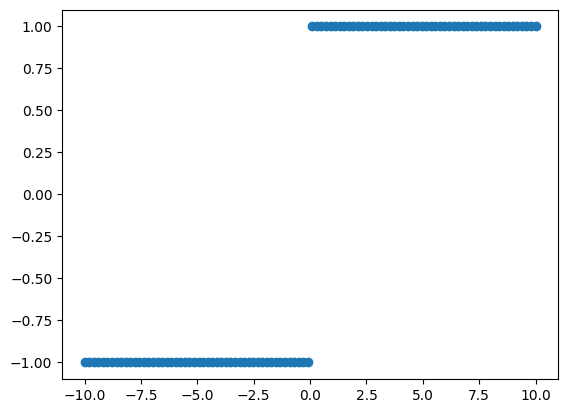

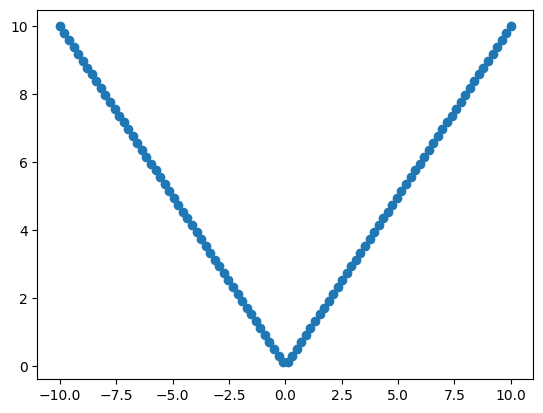

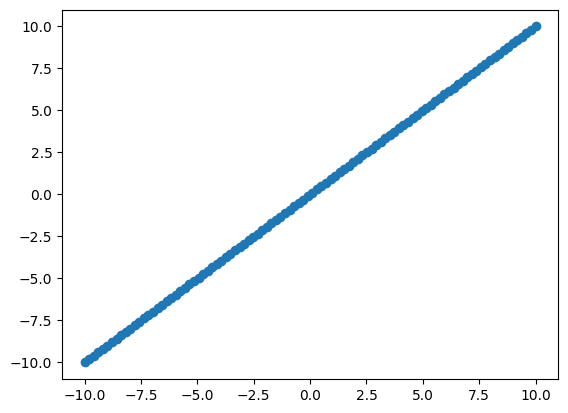

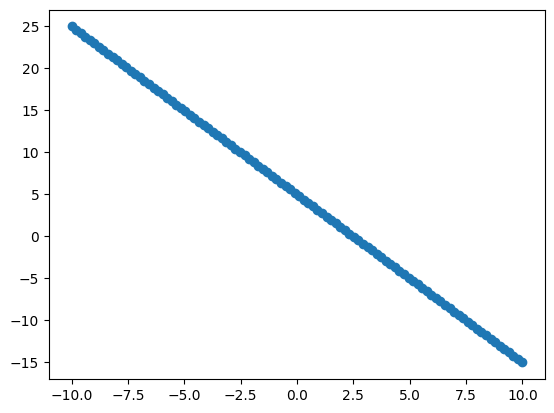

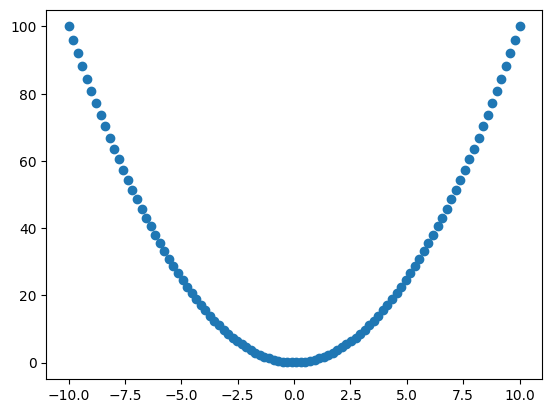

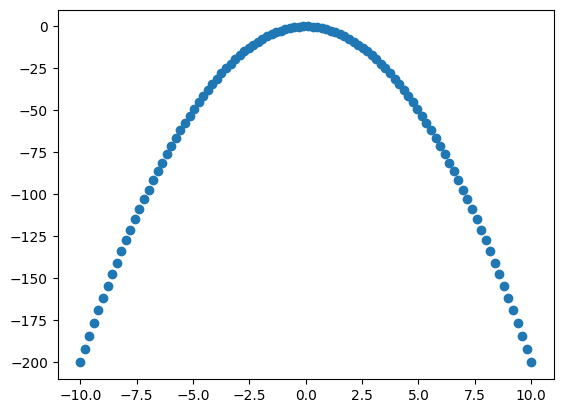

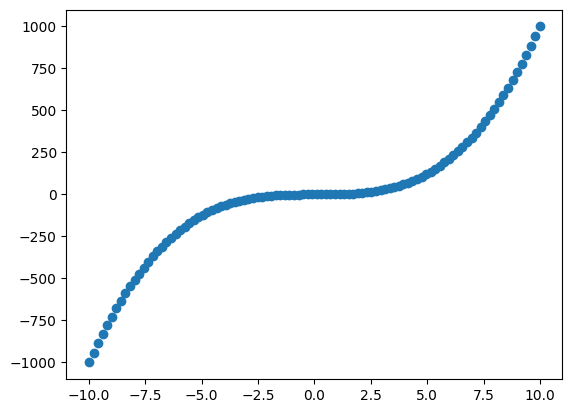

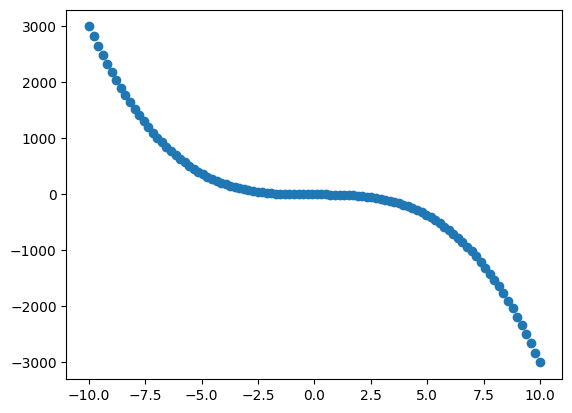

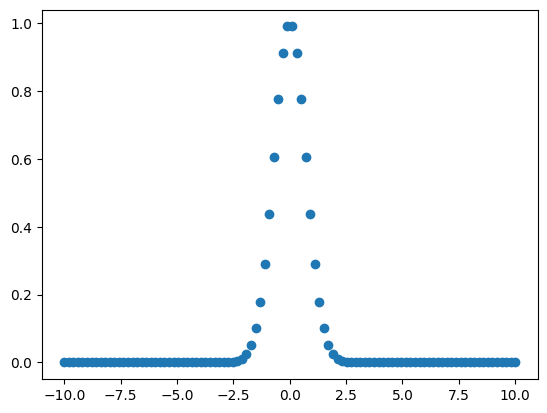

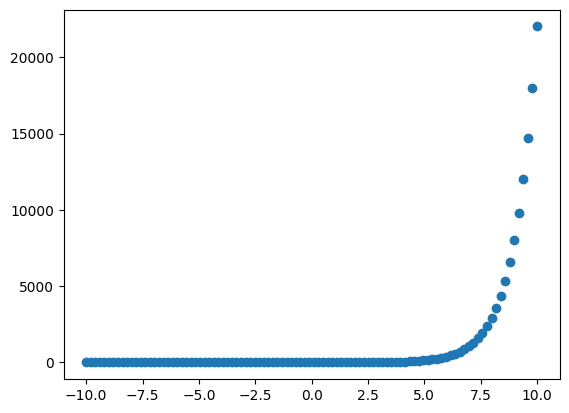

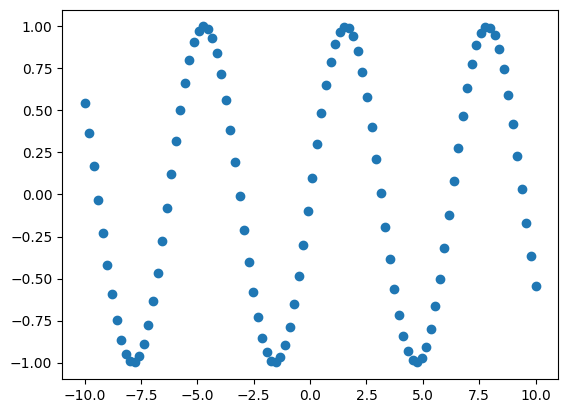

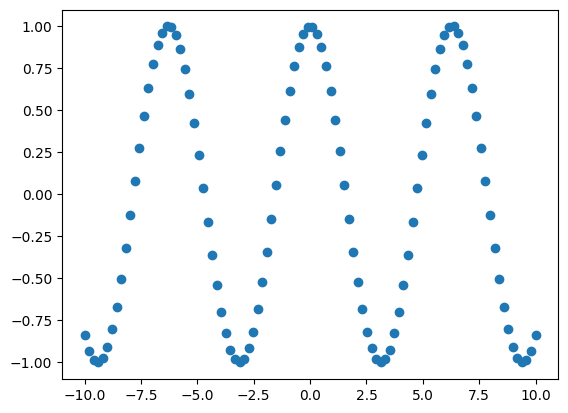

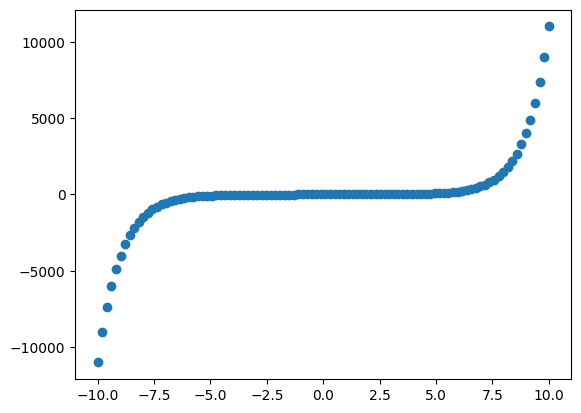

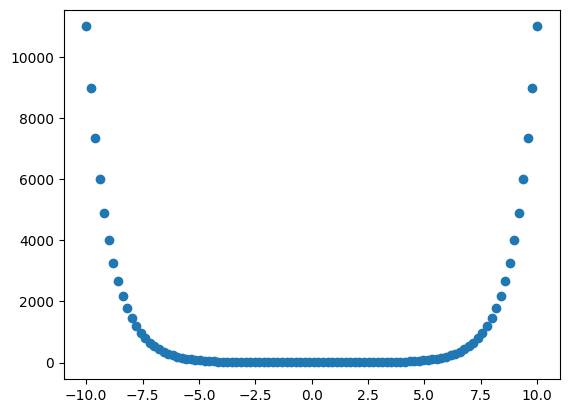

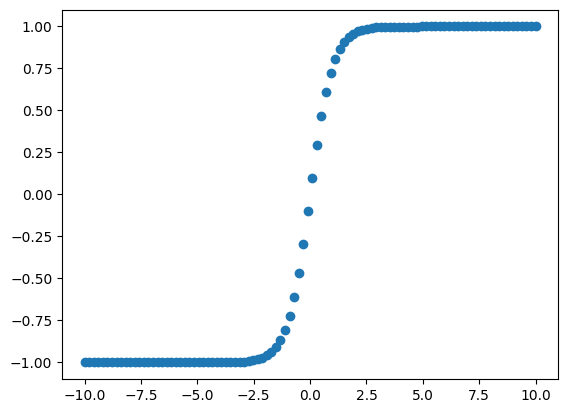

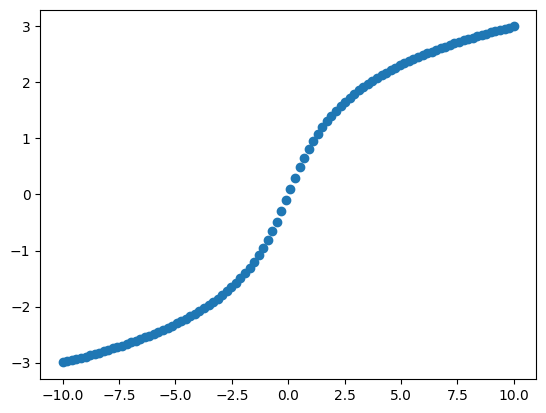

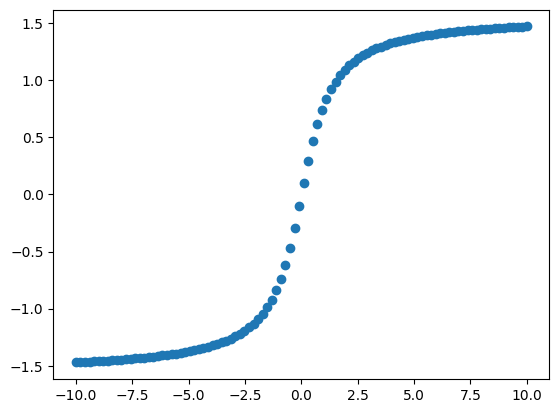

In [80]:
# for each, function draw 1000 samples from a uniform distribution and plot the function
import matplotlib.pyplot as plt
function_points = []
x = np.linspace(-10, 10, 100)
for f in functions:
    y = f(x)
    function_points.append(y)
    plt.scatter(x, y)
    plt.show()

Target function: [1.         0.97979798 0.95959596 0.93939394 0.91919192 0.8989899
 0.87878788 0.85858586 0.83838384 0.81818182 0.7979798  0.77777778
 0.75757576 0.73737374 0.71717172 0.6969697  0.67676768 0.65656566
 0.63636364 0.61616162 0.5959596  0.57575758 0.55555556 0.53535354
 0.51515152 0.49494949 0.47474747 0.45454545 0.43434343 0.41414141
 0.39393939 0.37373737 0.35353535 0.33333333 0.31313131 0.29292929
 0.27272727 0.25252525 0.23232323 0.21212121 0.19191919 0.17171717
 0.15151515 0.13131313 0.11111111 0.09090909 0.07070707 0.05050505
 0.03030303 0.01010101 0.01010101 0.03030303 0.05050505 0.07070707
 0.09090909 0.11111111 0.13131313 0.15151515 0.17171717 0.19191919
 0.21212121 0.23232323 0.25252525 0.27272727 0.29292929 0.31313131
 0.33333333 0.35353535 0.37373737 0.39393939 0.41414141 0.43434343
 0.45454545 0.47474747 0.49494949 0.51515152 0.53535354 0.55555556
 0.57575758 0.5959596  0.61616162 0.63636364 0.65656566 0.67676768
 0.6969697  0.71717172 0.73737374 0.75757576 0

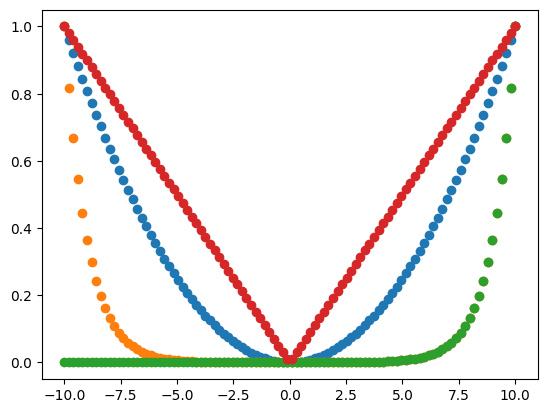

In [61]:
from scipy.spatial.distance import euclidean

# divide function values by the maximum value to normalize them
function_points = [f / np.max(f) for f in function_points]

# Function to find the top 3 most similar functions to a given function
def find_top_3_similar_functions(target_function, functions):
    distances = []
    
    for i, func in enumerate(functions):
        if np.array_equal(func, target_function):
            continue
        distance = euclidean(target_function, func)
        distances.append((distance, i, func))
    
    # Sort by distance
    distances.sort(key=lambda x: x[0])
    
    # Get the top 3 most similar functions
    top_3 = distances[:3]
    return top_3


# Target function (e.g., the first function in the list)
target_function = function_points[8]

# Find the most similar function
top_3_similar = find_top_3_similar_functions(target_function, function_points)

print(f"Target function: {target_function}")
for rank, (dist, idx, func) in enumerate(top_3_similar, 1):
    print(f"{rank}. Most similar function (index {idx}) with distance {dist}: {func}")

# plot the top 3 most similar functions
for rank, (_, _, func) in enumerate(top_3_similar, 1):
    plt.scatter(x, func, label=f"Rank {rank}")

# plot the target function
plt.scatter(x, target_function, label="Target function")

In [11]:
import t2ebm

import t2ebm.graphs as graphs

x:


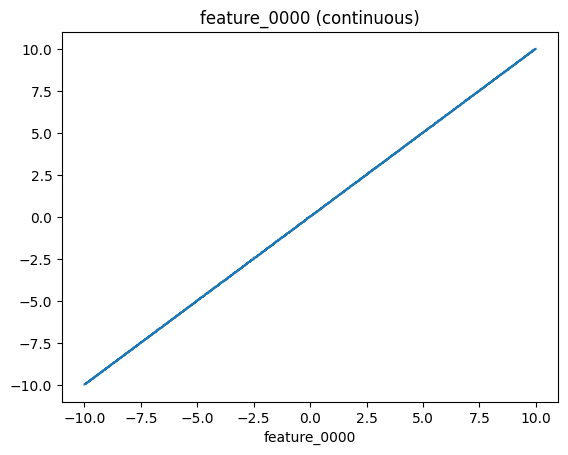

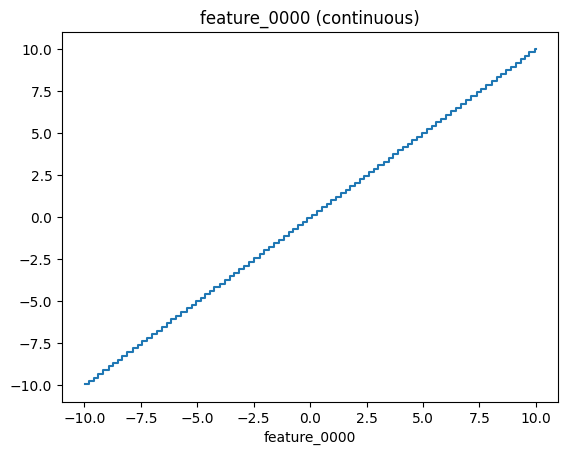

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.99, -9.58)": -9.96, "(-9.58, -9.17)": -9.55, "(-9.17, -8.72)": -9.1, "(-8.72, -8.31)": -8.69, "(-8.31, -7.86)": -8.27, "(-7.86, -7.43)": -7.8, "(-7.43, -7.01)": -7.4, "(-7.01, -6.57)": -6.97, "(-6.57, -6.15)": -6.53, "(-6.15, -5.71)": -6.09, "(-5.71, -5.24)": -5.65, "(-5.24, -4.85)": -5.22, "(-4.85, -4.42)": -4.81, "(-4.42, -4.01)": -4.4, "(-4.01, -3.56)": -3.97, "(-3.56, -3.16)": -3.54, "(-3.16, -2.73)": -3.11, "(-2.73, -2.5)": -2.68, "(-2.5, -2.02)": -2.41, "(-2.02, -1.81)": -1.99, "(-1.81, -1.38)": -1.76, "(-1.38, -1.15)": -1.34, "(-1.15, -0.74)": -1.12, "(-0.74, -0.32)": -0.71, "(-0.32, 0.1)": -0.29, "(0.1, 0.31)": 0.13, "(0.31, 0.55)": 0.35, "(0.55, 0.94)": 0.57, "(0.94, 1.36)": 0.98, "(1.36, 1.78)": 1.4, "(1.78, 2.

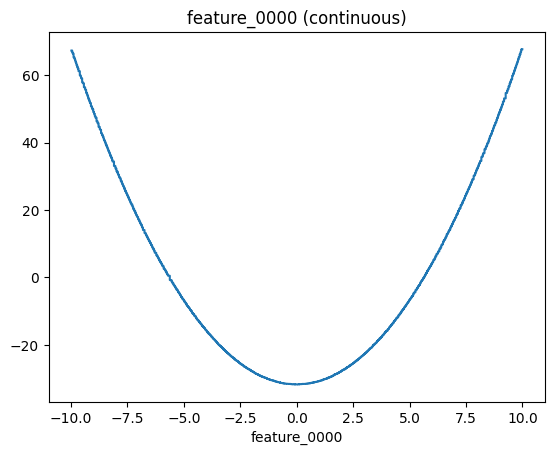

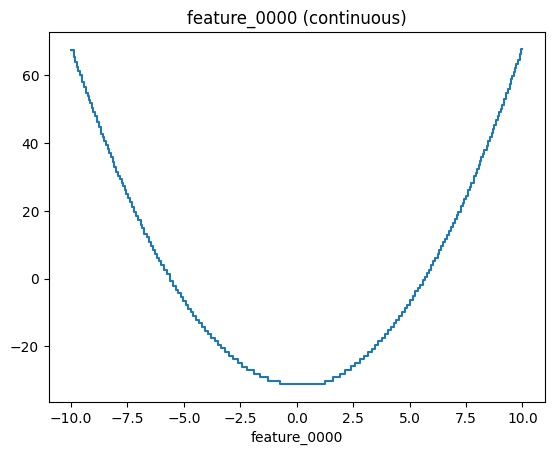

INFO: The graph of feature feature_0000 was simplified by 2.6%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.98, -9.8)": 67.33, "(-9.8, -9.66)": 63.97, "(-9.66, -9.5)": 61.22, "(-9.5, -9.33)": 57.87, "(-9.33, -9.14)": 54.89, "(-9.14, -9.01)": 51.69, "(-9.01, -8.87)": 49.11, "(-8.87, -8.67)": 46.33, "(-8.67, -8.46)": 42.8, "(-8.46, -8.23)": 39.55, "(-8.23, -8.09)": 35.84, "(-8.09, -7.89)": 33.05, "(-7.89, -7.7)": 30.41, "(-7.7, -7.46)": 27.33, "(-7.46, -7.28)": 23.83, "(-7.28, -7.03)": 21.03, "(-7.03, -6.74)": 17.22, "(-6.74, -6.46)": 13.18, "(-6.46, -6.17)": 9.74, "(-6.17, -5.89)": 6.18, "(-5.89, -5.62)": 2.55, "(-5.62, -5.24)": -0.8, "(-5.24, -4.89)": -4.38, "(-4.89, -4.57)": -7.84, "(-4.57, -4.19)": -10.97, "(-4.19, -3.78)": -14.27, "(-3.78, -3.34)": -17.55, "(-3.34, -2.82)": -20.64, "(-2.82, -2.19)": -23.9, "(-2.19, -1.28)":

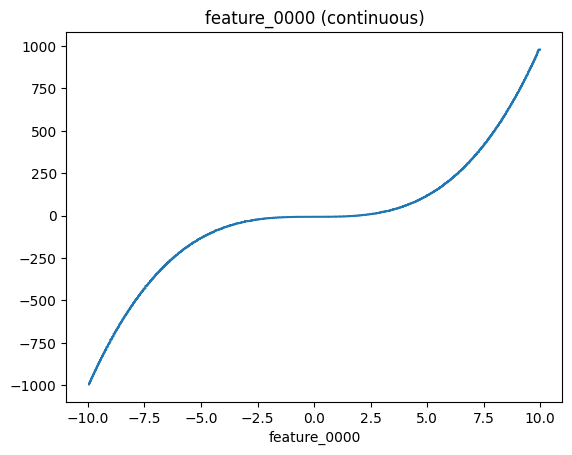

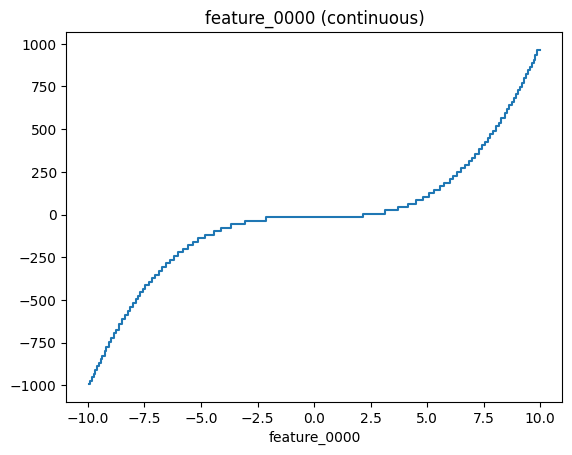

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.95, -9.83)": -995.0, "(-9.83, -9.75)": -954.1, "(-9.75, -9.6)": -932.5, "(-9.6, -9.44)": -888.0, "(-9.44, -9.27)": -847.0, "(-9.27, -9.19)": -800.4, "(-9.19, -9.07)": -775.9, "(-9.07, -8.97)": -748.9, "(-8.97, -8.86)": -725.9, "(-8.86, -8.62)": -695.2, "(-8.62, -8.49)": -642.1, "(-8.49, -8.35)": -612.7, "(-8.35, -8.23)": -585.9, "(-8.23, -8.01)": -563.1, "(-8.01, -7.78)": -517.3, "(-7.78, -7.55)": -476.9, "(-7.55, -7.46)": -436.3, "(-7.46, -7.16)": -414.7, "(-7.16, -6.85)": -371.9, "(-6.85, -6.71)": -329.0, "(-6.71, -6.53)": -306.3, "(-6.53, -6.21)": -284.3, "(-6.21, -5.8)": -243.4, "(-5.8, -5.37)": -201.6, "(-5.37, -4.81)": -160.6, "(-4.81, -4.11)": -117.3, "(-4.11, -3.07)": -76.7, "(-3.07, 2.17)": -36.5, "(2.17, 3.71)"

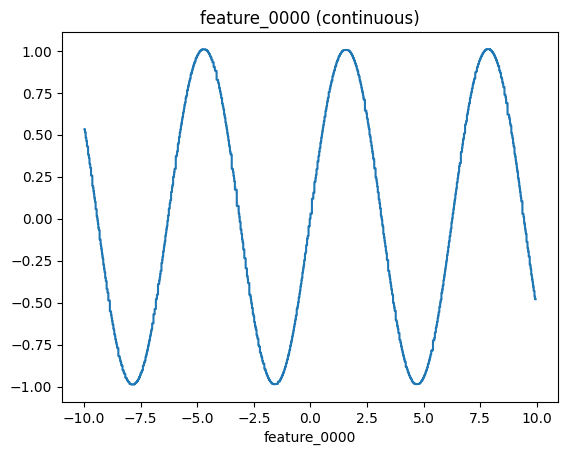

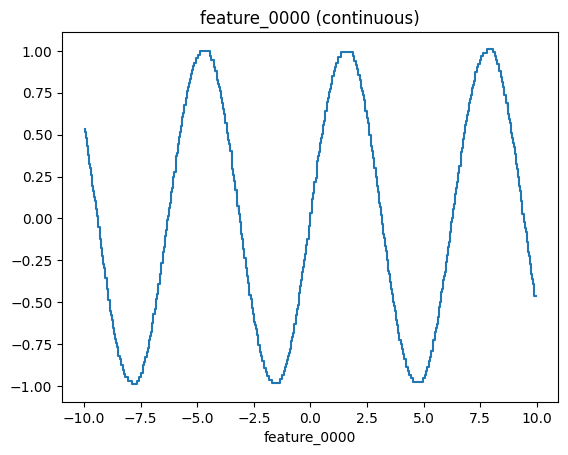

INFO: The graph of feature feature_0000 was simplified by 8.7%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.98, -9.76)": 0.533, "(-9.76, -9.55)": 0.326, "(-9.55, -9.37)": 0.127, "(-9.37, -9.16)": -0.054, "(-9.16, -8.93)": -0.272, "(-8.93, -8.67)": -0.488, "(-8.67, -8.36)": -0.689, "(-8.36, -7.05)": -0.871, "(-7.05, -6.83)": -0.678, "(-6.83, -6.58)": -0.481, "(-6.58, -6.37)": -0.264, "(-6.37, -6.16)": -0.066, "(-6.16, -5.95)": 0.158, "(-5.95, -5.72)": 0.372, "(-5.72, -5.45)": 0.552, "(-5.45, -5.08)": 0.762, "(-5.08, -3.99)": 0.954, "(-3.99, -3.76)": 0.76, "(-3.76, -3.48)": 0.571, "(-3.48, -3.25)": 0.296, "(-3.25, -3.02)": 0.075, "(-3.02, -2.86)": -0.122, "(-2.86, -2.63)": -0.296, "(-2.63, -2.41)": -0.481, "(-2.41, -2.13)": -0.66, "(-2.13, -0.73)": -0.848, "(-0.73, -0.52)": -0.65, "(-0.52, -0.32)": -0.47, "(-0.32, -0.08)": -0.29

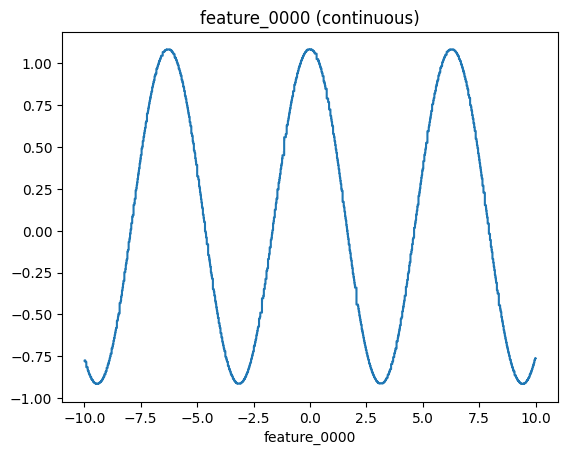

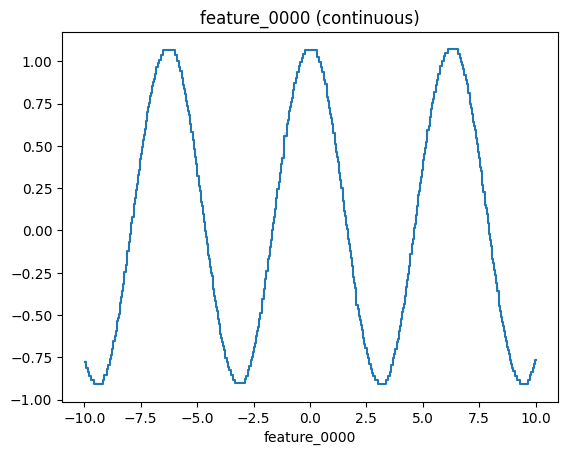

INFO: The graph of feature feature_0000 was simplified by 8.0%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.98, -8.61)": -0.777, "(-8.61, -8.43)": -0.593, "(-8.43, -8.22)": -0.432, "(-8.22, -8.03)": -0.248, "(-8.03, -7.82)": -0.067, "(-7.82, -7.62)": 0.154, "(-7.62, -7.46)": 0.329, "(-7.46, -7.22)": 0.491, "(-7.22, -6.95)": 0.699, "(-6.95, -6.62)": 0.875, "(-6.62, -5.62)": 1.034, "(-5.62, -5.35)": 0.862, "(-5.35, -5.14)": 0.683, "(-5.14, -4.91)": 0.478, "(-4.91, -4.74)": 0.265, "(-4.74, -4.57)": 0.096, "(-4.57, -4.39)": -0.081, "(-4.39, -4.2)": -0.249, "(-4.2, -3.99)": -0.417, "(-3.99, -3.75)": -0.578, "(-3.75, -2.29)": -0.753, "(-2.29, -2.12)": -0.572, "(-2.12, -1.92)": -0.404, "(-1.92, -1.73)": -0.239, "(-1.73, -1.56)": -0.054, "(-1.56, -1.39)": 0.125, "(-1.39, -1.14)": 0.287, "(-1.14, -0.87)": 0.558, "(-0.87, -0.63)": 0.732

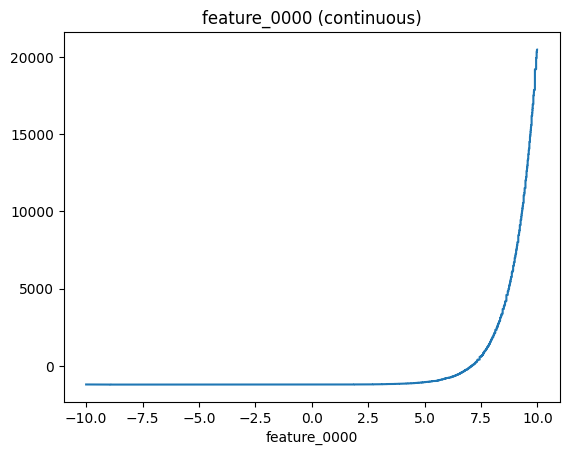

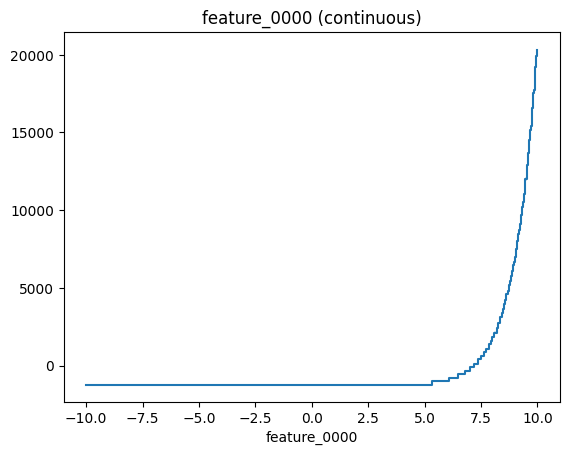

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-10.0, 6.07)": -1215.0, "(6.07, 6.78)": -771.8, "(6.78, 7.21)": -315.0, "(7.21, 7.35)": 134.7, "(7.35, 7.62)": 395.6, "(7.62, 7.85)": 853.5, "(7.85, 8.0)": 1368.4, "(8.0, 8.09)": 1837.9, "(8.09, 8.19)": 2130.8, "(8.19, 8.27)": 2453.6, "(8.27, 8.35)": 2739.2, "(8.35, 8.42)": 3105.8, "(8.42, 8.46)": 3364.4, "(8.46, 8.54)": 3674.5, "(8.54, 8.63)": 3959.5, "(8.63, 8.69)": 4585.9, "(8.69, 8.75)": 4830.0, "(8.75, 8.8)": 5164.2, "(8.8, 8.83)": 5448.3, "(8.83, 8.87)": 5750.2, "(8.87, 8.93)": 6058.1, "(8.93, 9.0)": 6478.7, "(9.0, 9.04)": 6989.4, "(9.04, 9.09)": 7251.7, "(9.09, 9.12)": 7735.1, "(9.12, 9.16)": 8001.1, "(9.16, 9.2)": 8458.0, "(9.2, 9.22)": 8707.8, "(9.22, 9.26)": 9113.2, "(9.26, 9.3)": 9449.8, "(9.3, 9.32)": 9715.8, "(

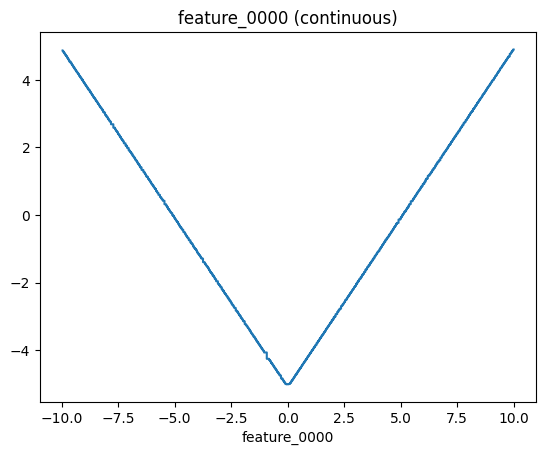

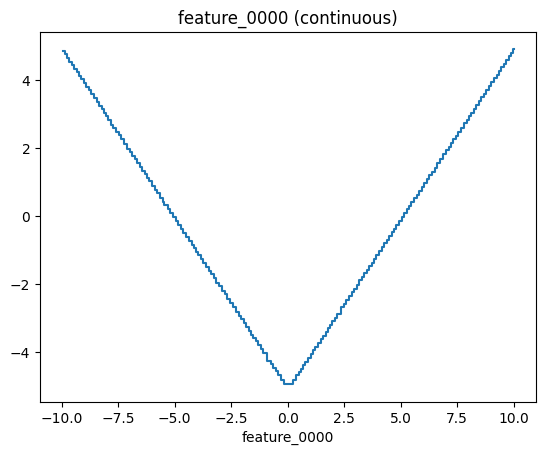

INFO: The graph of feature feature_0000 was simplified by 2.5%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.96, -9.68)": 4.868, "(-9.68, -9.34)": 4.544, "(-9.34, -9.01)": 4.23, "(-9.01, -8.7)": 3.908, "(-8.7, -8.35)": 3.599, "(-8.35, -8.03)": 3.249, "(-8.03, -7.72)": 2.929, "(-7.72, -7.38)": 2.583, "(-7.38, -7.1)": 2.261, "(-7.1, -6.76)": 1.978, "(-6.76, -6.47)": 1.662, "(-6.47, -6.12)": 1.332, "(-6.12, -5.78)": 1.017, "(-5.78, -5.52)": 0.672, "(-5.52, -5.2)": 0.419, "(-5.2, -4.84)": 0.088, "(-4.84, -4.62)": -0.254, "(-4.62, -4.26)": -0.503, "(-4.26, -3.95)": -0.85, "(-3.95, -3.6)": -1.16, "(-3.6, -3.27)": -1.508, "(-3.27, -2.92)": -1.833, "(-2.92, -2.54)": -2.21, "(-2.54, -2.3)": -2.555, "(-2.3, -1.96)": -2.834, "(-1.96, -1.62)": -3.149, "(-1.62, -1.3)": -3.494, "(-1.3, -0.93)": -3.813, "(-0.93, -0.52)": -4.257, "(-0.52, -0.3

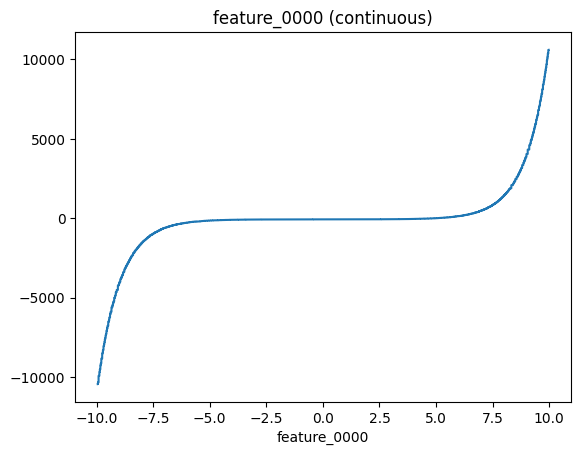

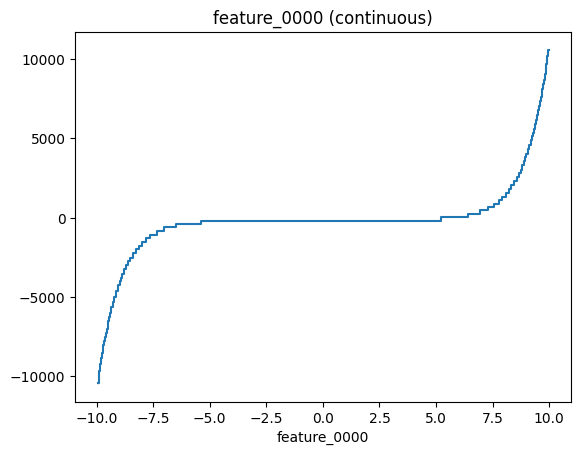

INFO: The graph of feature feature_0000 was simplified by 1.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.95, -9.91)": -10449.3, "(-9.91, -9.83)": -9927.2, "(-9.83, -9.79)": -9268.5, "(-9.79, -9.75)": -8838.4, "(-9.75, -9.69)": -8524.6, "(-9.69, -9.65)": -8049.2, "(-9.65, -9.62)": -7794.7, "(-9.62, -9.54)": -7525.7, "(-9.54, -9.52)": -7044.2, "(-9.52, -9.44)": -6781.2, "(-9.44, -9.38)": -6251.4, "(-9.38, -9.34)": -5991.2, "(-9.34, -9.27)": -5613.5, "(-9.27, -9.22)": -5351.9, "(-9.22, -9.15)": -5026.6, "(-9.15, -9.06)": -4656.3, "(-9.06, -8.92)": -4236.5, "(-8.92, -8.77)": -3790.6, "(-8.77, -8.6)": -3217.7, "(-8.6, -8.39)": -2752.4, "(-8.39, -8.14)": -2202.9, "(-8.14, -7.82)": -1769.2, "(-7.82, -7.33)": -1300.0, "(-7.33, -6.49)": -840.9, "(-6.49, 5.24)": -401.9, "(5.24, 6.95)": 23.1, "(6.95, 7.56)": 459.8, "(7.56, 7.93)": 890

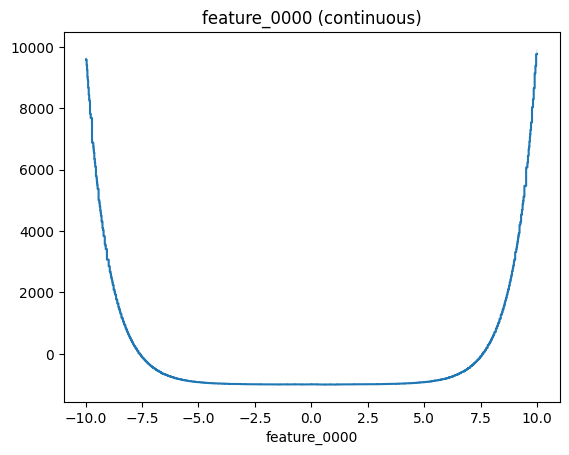

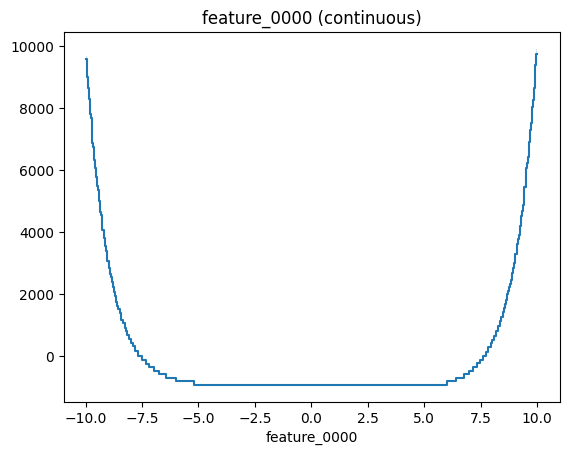

INFO: The graph of feature feature_0000 was simplified by 2.3%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.97, -9.93)": 9597.0, "(-9.93, -9.88)": 9246.0, "(-9.88, -9.84)": 8669.5, "(-9.84, -9.8)": 8307.4, "(-9.8, -9.71)": 7822.5, "(-9.71, -9.63)": 6880.1, "(-9.63, -9.61)": 6610.1, "(-9.61, -9.57)": 6344.0, "(-9.57, -9.54)": 6094.7, "(-9.54, -9.48)": 5795.2, "(-9.48, -9.42)": 5497.2, "(-9.42, -9.35)": 5005.2, "(-9.35, -9.29)": 4666.0, "(-9.29, -9.2)": 4311.3, "(-9.2, -9.15)": 3832.0, "(-9.15, -9.05)": 3564.2, "(-9.05, -8.92)": 3067.2, "(-8.92, -8.83)": 2675.1, "(-8.83, -8.75)": 2401.2, "(-8.75, -8.65)": 2084.2, "(-8.65, -8.54)": 1770.8, "(-8.54, -8.41)": 1516.6, "(-8.41, -8.27)": 1181.8, "(-8.27, -8.06)": 930.5, "(-8.06, -7.79)": 560.3, "(-7.79, -7.49)": 187.3, "(-7.49, -6.97)": -121.4, "(-6.97, -6.01)": -466.1, "(-6.01, 6.97)

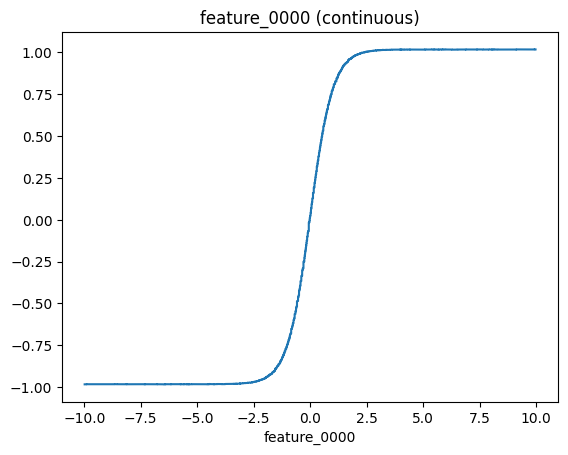

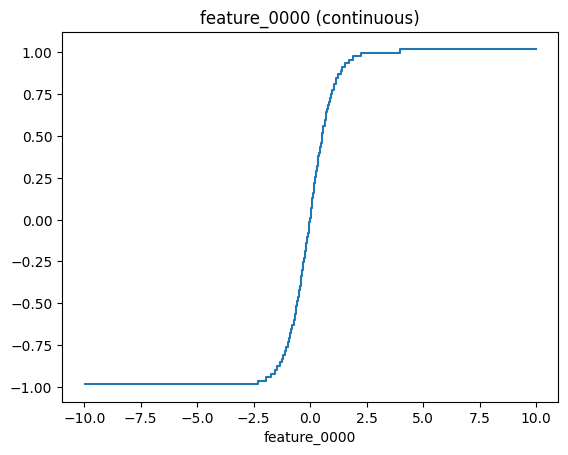

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.98, -1.96)": -0.984, "(-1.96, -1.56)": -0.942, "(-1.56, -1.45)": -0.899, "(-1.45, -1.25)": -0.874, "(-1.25, -1.12)": -0.83, "(-1.12, -1.05)": -0.784, "(-1.05, -0.99)": -0.761, "(-0.99, -0.92)": -0.734, "(-0.92, -0.88)": -0.707, "(-0.88, -0.84)": -0.68, "(-0.84, -0.74)": -0.653, "(-0.74, -0.68)": -0.599, "(-0.68, -0.61)": -0.563, "(-0.61, -0.58)": -0.519, "(-0.58, -0.53)": -0.486, "(-0.53, -0.49)": -0.463, "(-0.49, -0.45)": -0.423, "(-0.45, -0.43)": -0.398, "(-0.43, -0.39)": -0.367, "(-0.39, -0.35)": -0.336, "(-0.35, -0.29)": -0.303, "(-0.29, -0.23)": -0.25, "(-0.23, -0.19)": -0.206, "(-0.19, -0.17)": -0.164, "(-0.17, -0.13)": -0.14, "(-0.13, -0.11)": -0.101, "(-0.11, -0.06)": -0.077, "(-0.06, -0.02)": -0.016, "(-0.02, 0.

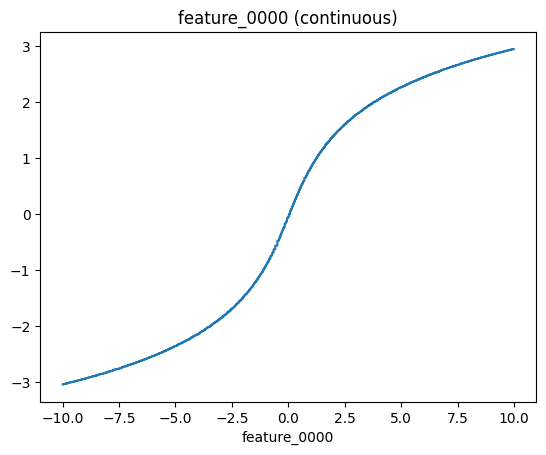

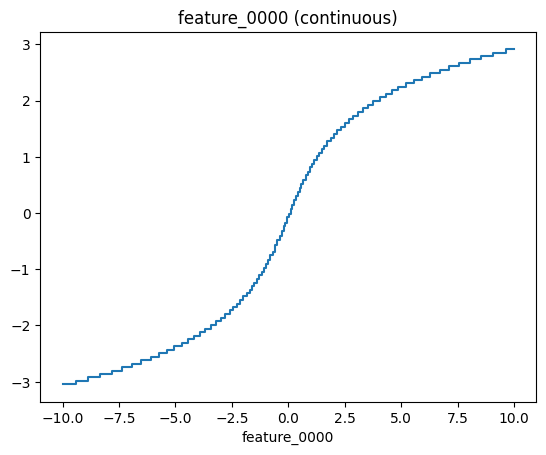

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.99, -8.86)": -3.048, "(-8.86, -7.81)": -2.924, "(-7.81, -6.93)": -2.802, "(-6.93, -6.09)": -2.681, "(-6.09, -5.36)": -2.556, "(-5.36, -4.71)": -2.431, "(-4.71, -4.18)": -2.305, "(-4.18, -3.67)": -2.181, "(-3.67, -3.21)": -2.055, "(-3.21, -2.79)": -1.926, "(-2.79, -2.45)": -1.798, "(-2.45, -2.16)": -1.671, "(-2.16, -2.0)": -1.55, "(-2.0, -1.72)": -1.484, "(-1.72, -1.51)": -1.36, "(-1.51, -1.28)": -1.236, "(-1.28, -1.18)": -1.108, "(-1.18, -0.99)": -1.04, "(-0.99, -0.89)": -0.911, "(-0.89, -0.79)": -0.84, "(-0.79, -0.7)": -0.753, "(-0.7, -0.58)": -0.687, "(-0.58, -0.49)": -0.567, "(-0.49, -0.37)": -0.481, "(-0.37, -0.3)": -0.403, "(-0.3, -0.21)": -0.323, "(-0.21, -0.06)": -0.238, "(-0.06, 0.1)": -0.074, "(0.1, 0.18)": 0.07

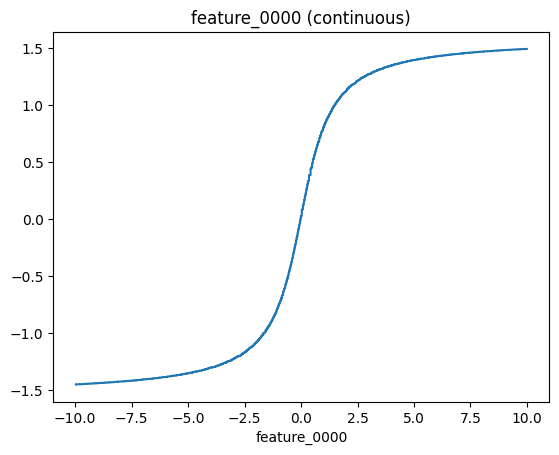

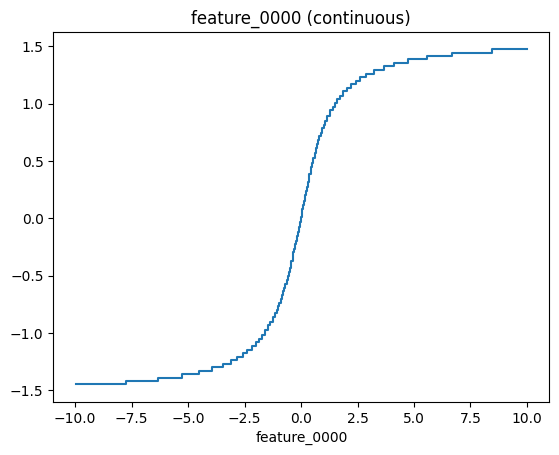

INFO: The graph of feature feature_0000 was simplified by 1.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: feature_0000
Feature Type: continuous
Means: {"(-9.97, -6.31)": -1.45, "(-6.31, -4.52)": -1.391, "(-4.52, -3.47)": -1.33, "(-3.47, -2.85)": -1.268, "(-2.85, -2.38)": -1.208, "(-2.38, -2.02)": -1.146, "(-2.02, -1.86)": -1.084, "(-1.86, -1.58)": -1.05, "(-1.58, -1.44)": -0.978, "(-1.44, -1.25)": -0.936, "(-1.25, -1.15)": -0.862, "(-1.15, -1.02)": -0.827, "(-1.02, -0.91)": -0.768, "(-0.91, -0.85)": -0.708, "(-0.85, -0.74)": -0.667, "(-0.74, -0.64)": -0.605, "(-0.64, -0.59)": -0.541, "(-0.59, -0.55)": -0.504, "(-0.55, -0.51)": -0.471, "(-0.51, -0.43)": -0.436, "(-0.43, -0.37)": -0.374, "(-0.37, -0.34)": -0.335, "(-0.34, -0.26)": -0.296, "(-0.26, -0.19)": -0.227, "(-0.19, -0.14)": -0.152, "(-0.14, -0.11)": -0.119, "(-0.11, -0.06)": -0.078, "(-0.06, -0.02)": -0.033, "(-0.02, 0

In [30]:
# for each function, draw 1000 samples from a normal distribution and fit an ebm
from interpret.glassbox import ExplainableBoostingRegressor

functions_as_text = []
for f in functions:
    print(benchmark[functions.index(f)][1]  + ':')
    x = np.random.uniform(-10, 10, 1000)
    y = f(x)
    ebm = ExplainableBoostingRegressor()    
    ebm.fit(x.reshape(-1, 1), y)
    ebm_global = ebm.explain_global()

    graph = graphs.extract_graph(ebm, 0)
    graphs.plot_graph(graph)
    graph = t2ebm.graphs.simplify_graph(graph, min_variation_per_cent=0.01)
    graphs.plot_graph(graph)
    plt.show()

    graph_as_text = graphs.graph_to_text(graph, max_tokens=1000, x_axis_precision=2, confidence_bounds=False)
    print(graph_as_text)
    functions_as_text.append(graph_as_text)

# Run the benchmark

In [31]:
function_names = [name for _, name in benchmark]
cases = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']

options = '\n'.join([f'{case} {name}' for case, name in zip(cases, function_names)])
print(options)

a) x
b) x^2
c) x^3
d) sin(x)
e) cos(x)
f) exp(x)
g) |x|
h) sinh(x)
i) cosh(x)
j) tanh(x)
k) arcsinh(x)
l) arctan(x)


In [32]:
for graph_idx in range(len(benchmark)):
    print(f'Graph {benchmark[graph_idx][1]}')
    # initial description message
    graph_as_text = functions_as_text[graph_idx]
    prompt = t2ebm.prompts.describe_graph(
        graph_as_text, include_assistant_response=False
    )
    messages = t2ebm.utils.parse_guidance_query(prompt)
    # send query
    response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', messages)
    # prepare next query
    messages.append({'role': 'assistant', 'content': response})

    mc_options = [benchmark[graph_idx][1]]
    # select 4 more random functions
    for _ in range(4):
        random_idx = np.random.randint(0, len(benchmark))
        while random_idx == graph_idx:
            random_idx = np.random.randint(0, len(benchmark))
        mc_options.append(benchmark[random_idx][1])
    # shuffle options
    np.random.shuffle(mc_options)
    mc_options = '\n'.join([f'{case} {name}' for case, name in zip(cases, mc_options)])
    print('MC OPTIONS:', mc_options)

    mc_question = f"""It turns out that the graph depicts one of the following functions:

{mc_options}

Your task now is to identify which of the functions is the one that is depicted in the graph. Think step by step.
"""
    messages.append({'role': 'user', 'content': mc_question})
    # send query
    response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', messages) 
    print(response)
    print('-'*80)
    

Graph x
MC OPTIONS: a) sinh(x)
b) sin(x)
c) tanh(x)
d) x
e) sinh(x)
Let's analyze the given options one by one to identify which function best describes the pattern in the graph.

### Option (a) sinh(x)
The hyperbolic sine function sinh(x) is defined as:
\[ \text{sinh}(x) = \frac{e^x - e^{-x}}{2} \]
- The shape of sinh(x) shows an exponential growth for both positive and negative values of x.
- For negative values of x, sinh(x) is negative, and for positive values of x, sinh(x) is positive.
- The function is monotonic and unbounded, growing rapidly in both directions.

### Option (b) sin(x)
The sine function sin(x) is periodic and oscillatory:
\[ \text{sin}(x) \]
- The range is \([-1, 1]\), and it oscillates between these values.
- This cannot describe a monotonically increasing relationship as seen in the given data.

### Option (c) tanh(x)
The hyperbolic tangent function tanh(x) is defined as:
\[ \text{tanh}(x) = \frac{\text{sinh}(x)}{\text{cosh}(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x

a) x
b) x^2
c) x^3
d) sin(x)
e) cos(x)
f) exp(x)
g) |x|
h) sinh(x)
i) cosh(x)
j) tanh(x)
k) arcsinh(x)
l) arctan(x)


In [6]:
prompt = t2ebm.prompts.describe_graph(
    graph_as_text, include_assistant_response=True
)
prompt

'{{#system~}}\nYou are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, categorical, or boole

In [15]:
messages = t2ebm.utils.parse_guidance_query(prompt)

In [17]:
messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [20]:
response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', messages[:-1])
print(response)

The graph represents the effect of the continuous feature "feature_0000" on the output of the generalized additive model. Here's a detailed description of the general pattern from the data provided:

1. **Negative Values (Left Side of the Graph)**:
    - For highly negative values of "feature_0000", we observe mean values starting from around -1.527 for the interval (-9.96, -6.32).
    - As "feature_0000" increases towards less negative values, the mean values gradually increase (become less negative) until around -0.391 for the interval (-0.36, -0.31).

2. **Transition Around Zero**:
    - Around zero, we see the values transitioning from negative to positive. For example:
        - (-0.09, -0.05): -0.139
        - (-0.05, 0.0): -0.076
        - (0.0, 0.05): -0.028
        - (0.05, 0.11): 0.024
    - This indicates a crossing over to positive effects on the output.

3. **Positive Values (Right Side of the Graph)**:
    - For positive values of "feature_0000", we observe an increasing 

In [22]:
new_messages = messages[:-1]

In [23]:
new_messages.append({'role': 'assistant', 'content': response})
new_messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [24]:
mc_question = """It turns out that the depicted graph is one of the following functions:

a) f(x) = sin(x)
b) f(x) = cos(x)
c) f(x) = exp(x)
d) f(x) = |x|
e) f(x) = arctan(x)
f) f(x) = sinh(x)
g) f(x) = cosh(x)
h) f(x) = tanh(x)
i) f(x) = arcsinh(x)
j) f(x) = arctan(x) 

Your task now is to identify which of the functions is the one that generated the graph. Think step by step.
"""

In [25]:
new_messages.append({'role': 'user', 'content': mc_question})
new_messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [26]:
response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', new_messages)
print(response)

To identify which of the provided functions is the one that generated the graph, we need to consider the general pattern steps I previously outlined in the data.

### Step-by-Step Analysis:
1. **Examine the Ending Values (For High Magnitudes of x)**:
   - For large positive and negative values of "feature_0000", whether \(x\) or \(-x\), the function seems to diverge (negative values become more negative and positive values become more positive).
   - This behavior primarily rules out functions that are periodic or bounded, such as \( \sin(x) \), \( \cos(x) \), \( \text{arctan}(x) \), \( \text{tanh}(x) \).

2. **Crossing Point Near Zero**:
   - There is a smooth crossing through zero, which matches functions like \(e^x\) and those with smooth transitions from negative to positive or those defined in such a way.
   - This crossing point further narrows down functions. Functions like \(e^x\) show exponential growth, but \(e^x\) doesn't cross from negative to positive.

3. **Behavior Aroun

In [12]:
t2ebm.utils.parse_guidance_query(prompt)[0]['content']

'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, categorical, or boolean)\n    - Mea

In [ ]:
# TODO

- convert queries to the openai format
- write a cot execution function

- later port everything to the newest version of guidance? not required for the benchmarks at this point

In [11]:
import guidance

In [18]:
from guidance import models, gen

gpt = models.OpenAI('gpt-4-turbo-2024-04-09')

In [20]:

gpt + gen(prompt)

ValueError: token_ids must contain some tokens.

In [13]:
response = guidance(prompt, )()

TypeError: _Guidance.__call__() takes from 1 to 2 positional arguments but 3 were given